# <center>Machine Intelligence 1</center>
<h2 align="right">Exercise Sheet 03</h2> 
<pre style="text-align: right">
Gruppe:             
                MeSi
Autoren:            
Jens Meiners
Arne Siebenmorgen
</pre>

<img src="Auswahl_2015-11-25_001.png"/>

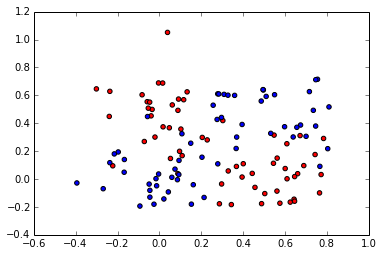

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#training data
cov = [[0.1, 0], [0, 0.1]]

mean1 = [0. , 1.]
mean2 = [1. , 0.]
mean3 = [0. , 0.]
mean4 = [1. , 1.]

p1 = 0.5*(np.vstack((np.random.multivariate_normal(mean1, cov, 30), np.random.multivariate_normal(mean2, cov, 30))))
p2 = 0.5*(np.vstack((np.random.multivariate_normal(mean3, cov, 30), np.random.multivariate_normal(mean4, cov, 30))))

plt.scatter(p1[:,0], p1[:,1], c='red')
plt.scatter(p2[:,0], p2[:,1], c='blue')
plt.show()

p1 = np.append(p1,np.ones((60,1)), axis=1)
p2 = np.append(p2,np.zeros((60,1)), axis=1)

trndata = np.append(p1,p2, axis =0)
np.random.shuffle(trndata)


<img src="Auswahl_2015-11-25_002.png"/>

In [2]:
def kNNclassifier(point, trndata, k, verbose=False):
    #find k nearest neighbors
    dist = np.zeros((len(trndata),1))
    point = np.asarray(point)
    for i in range(len(trndata)):
        dist[i] = np.linalg.norm(point-trndata[i,0:2])
    distdata = np.concatenate((trndata,dist), axis = 1)
    distdata = distdata[distdata[:,3].argsort()]
    neighbors = distdata[0:k,:]
    #classify
    cls = 0
    vote = np.sum(neighbors[:,2])/k    
    if(vote>=0.5):
        cls = 1
    if(verbose):
        print "neighbors",neighbors
        print "vote",vote
    return cls    
        

<img src="Auswahl_2015-11-25_003.png"/>

In [3]:
x_range = np.linspace(-0.4,1,25)
y_range = np.linspace(-0.4,1,25)

xx,yy = np.meshgrid(x_range,y_range)

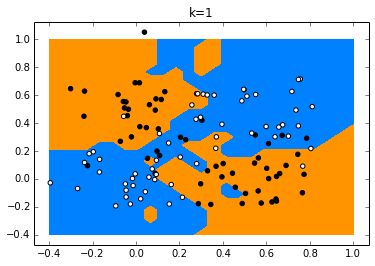

In [4]:
#k=1
zz = np.zeros(xx.shape)
for x in range(len(x_range)):
    for y in range(len(y_range)):
        zz[x,y]=  kNNclassifier((xx[0,x],yy[y,0]),trndata,1)

plt.contourf(xx, yy, zz, levels=[0.,0.5,1.])
plt.scatter(p1[:,0], p1[:,1], c='black')
plt.scatter(p2[:,0], p2[:,1], c='white')
plt.title("k=1")
plt.show()



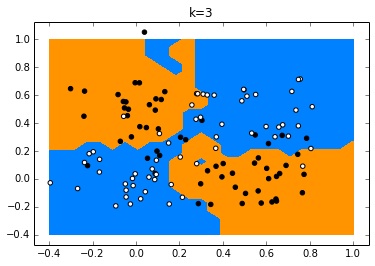

In [5]:
#k=3
zz = np.zeros(xx.shape)
for x in range(len(x_range)):
    for y in range(len(y_range)):
        zz[x,y]=  kNNclassifier((xx[0,x],yy[y,0]),trndata,3)

plt.contourf(xx, yy, zz, levels=[0.,0.5,1.])
plt.scatter(p1[:,0], p1[:,1], c='black')
plt.scatter(p2[:,0], p2[:,1], c='white')
plt.title("k=3")
plt.show()

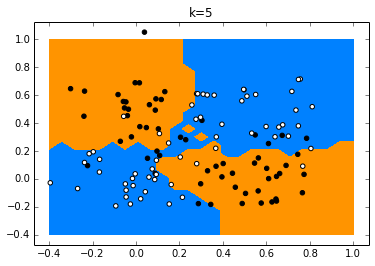

In [6]:
#k=5
zz = np.zeros(xx.shape)
for x in range(len(x_range)):
    for y in range(len(y_range)):
        zz[x,y]=  kNNclassifier((xx[0,x],yy[y,0]),trndata,5)

plt.contourf(xx, yy, zz, levels=[0.,0.5,1.])
plt.scatter(p1[:,0], p1[:,1], c='black')
plt.scatter(p2[:,0], p2[:,1], c='white')
plt.title("k=5")
plt.show()

<img src="Auswahl_2015-11-25_004.png"/>

In [7]:
from scipy.stats import multivariate_normal

In [8]:
def parzenclassifier(point, trndata, sig, verbose=False):

    dist = np.zeros((len(trndata),1))
    vote0 = 0
    vote1 = 0
    point = np.asarray(point)
    for i in range(len(trndata)):

        g_pdf = multivariate_normal(mean=trndata[i,0:2], cov=[[sig,0],[0,sig]])
        if(trndata[i,2]==0):            
            vote0 += g_pdf.pdf(point)
        elif(trndata[i,2]==1):
            vote1 += g_pdf.pdf(point)

    cls = 0
    if(vote1>=vote0):
        cls = 1
    if(verbose):
        print "vote",vote
    return cls  

<img src="Auswahl_2015-11-25_005.png"/>

In [9]:
x_range = np.linspace(-0.4,1,25)
y_range = np.linspace(-0.4,1,25)

xx,yy = np.meshgrid(x_range,y_range)

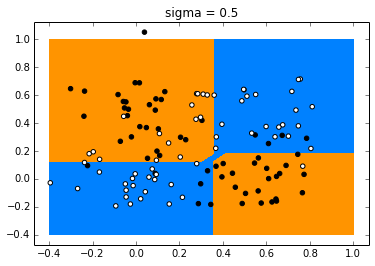

In [10]:
zz = np.zeros(xx.shape)
for x in range(len(x_range)):
    for y in range(len(y_range)):
        zz[x,y]=  parzenclassifier((xx[0,x],yy[y,0]),trndata,0.5)

plt.contourf(xx, yy, zz, levels=[-1,0,1.])
plt.scatter(p1[:,0], p1[:,1], c='black')
plt.scatter(p2[:,0], p2[:,1], c='white')
plt.title("sigma = 0.5")
plt.show()

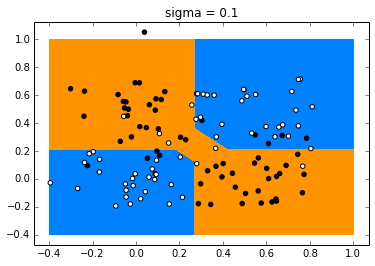

In [11]:
zz = np.zeros(xx.shape)
for x in range(len(x_range)):
    for y in range(len(y_range)):
        zz[x,y]=  parzenclassifier((xx[0,x],yy[y,0]),trndata,0.1)

plt.contourf(xx, yy, zz, levels=[0.,0.5,1.])
plt.scatter(p1[:,0], p1[:,1], c='black')
plt.scatter(p2[:,0], p2[:,1], c='white')
plt.title("sigma = 0.1")
plt.show()

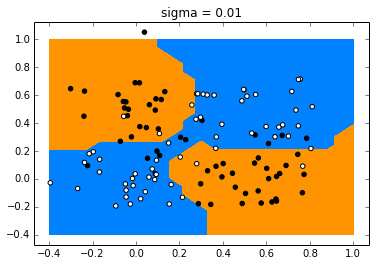

In [12]:
zz = np.zeros(xx.shape)
for x in range(len(x_range)):
    for y in range(len(y_range)):
        zz[x,y]=  parzenclassifier((xx[0,x],yy[y,0]),trndata,0.01)

plt.contourf(xx, yy, zz, levels=[0.,0.5,1.])
plt.scatter(p1[:,0], p1[:,1], c='black')
plt.scatter(p2[:,0], p2[:,1], c='white')
plt.title("sigma = 0.01")
plt.show()

<img src="Auswahl_2015-11-25_006.png"/>

To change the kNN-classifier to classify into three groups the following changes need to be made:
* The classifier would need to use real classes. With two classes a numerical representation is sufficient
* The training set would vote for their classes and the class with the most votes is chosen
* A problem would be, that with 3 classes there is the possibility of ambiguous votes

To change the kNN-classifier to classify into three groups the following changes need to be made:
* This classifier would just need to get a counter and a request for the third class

<img src="Auswahl_2015-11-25_007.png"/>

In [13]:
from sklearn.cluster import KMeans
from scipy import *
from scipy.linalg import norm, pinv
np.random.seed(42)

In [14]:
def k_repr(X, n):
    model = KMeans(init='k-means++',n_clusters=n)
    model.fit(X)
    return model.cluster_centers_

<img src="Auswahl_2015-11-25_008.png"/>

In [15]:
def _phi(x_a, mu_j, sigma):
    return exp(-norm(x_a - mu_j)**2/(2*sigma**2))

def _y(w, q, c, sigma):
    return np.sign(w.T.dot(_phi(q, c, sigma)))

<img src="Auswahl_2015-11-25_009.png"/>

In [16]:
class RBFNN:
    """
    construct a Radial Basis Function Network class
    """

    def __init__(self, _in, nc, _out, sigma):
        """
        _in: number of inputs
        nc: number of hidden nodes (centroids)
        _out: number of outputs
        sigma: used for rbf 
        """
        self._in = _in
        self._out = _out
        self.nc = nc
        
        #self.c = [random.uniform(-1, 1, _in) for i in xrange(nc)]
        self.sigma = sigma
        self.w = random.random((self.nc, self._out))
         
    def _function(self, q, c):
        return _phi(q, c, self.sigma)
     
    def _activate(self, X):
        # calculate activations of RBFs
        _Phi = zeros((X.shape[0], self.nc), float)
        for ci, c in enumerate(self.c):
            for xi, x in enumerate(X):
                _Phi[xi,ci] = self._function(x, c)
        return _Phi
     
    def train(self, X, Y, centers=None):
        """ X: matrix of dimensions n x indim 
            y: column vector of dimension n x 1 """
         
        if centers:
            self.c = centers
        else:
            self.c = k_repr(X, self.nc)
        ## choose random center vectors from training set
        #rnd_idx = random.permutation(X.shape[0])[:self.nc]
        #self.c = [X[i,:] for i in rnd_idx]
         
        #print "center", self.c
        # calculate activations of RBFs
        _Phi = self._activate(X)
        # add bias
        #_Phi = np.concatenate((np.ones((_Phi.shape[0],1)), _Phi), axis=1)
        #print _Phi
         
        # calculate output weights (pseudoinverse)
        self.w = dot(pinv(_Phi), Y)
        
    def _y(self, X):
        """ X: matrix of dimensions n x indim """
        _Phi = self._activate(X)
        Y = dot(_Phi, self.w)
        return Y

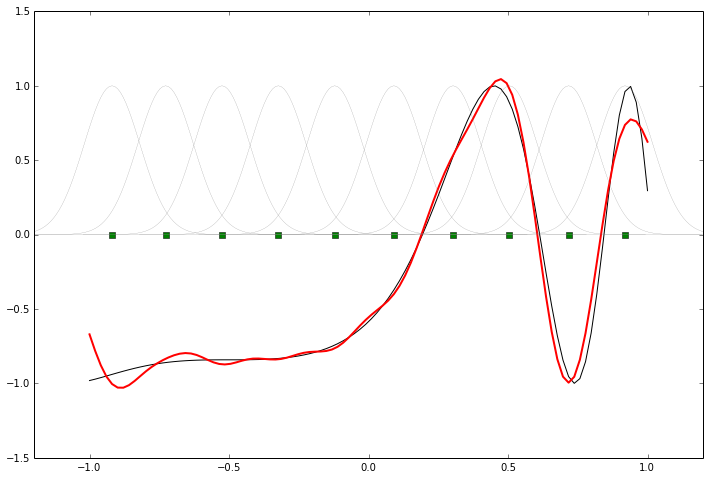

In [17]:
######################
# TEST THE NETWORK CLASS
######################

n = 100
x = mgrid[-1:1:complex(0,n)].reshape(n, 1)
# set y and add random noise
y = sin(3*(x+0.5)**3 - 1)
# y += random.normal(0, 0.1, y.shape)

# rbf regression
rbf = RBFNN(1, 10, 1, 0.1)
rbf.train(x, y)
z = rbf._y(x)

# plot original data
plt.figure(figsize=(12, 8))
plt.plot(x, y, 'k-')

# plot learned model
plt.plot(x, z, 'r-', linewidth=2)

# plot rbfs
plt.plot(rbf.c, zeros(rbf.nc), 'gs')

for c in rbf.c:
    # RF prediction lines
    cx = arange(c-0.7, c+0.7, 0.01)
    cy = [rbf._function(array([cx_]), array([c])) for cx_ in cx]
    plt.plot(cx, cy, '-', color='gray', linewidth=0.2)

plt.xlim(-1.2, 1.2)
plt.show()

<img src="Auswahl_2015-11-25_010.png"/>

In [18]:
x_range = np.linspace(-0.4,1,25)
y_range = np.linspace(-0.4,1,25)

xx,yy = np.meshgrid(x_range,y_range)

def plot_rbf(rbf):
    zz = np.zeros(xx.shape)
    for x in range(len(x_range)):
        for y in range(len(y_range)):
            zz[x,y] = rbf._y(np.array([[xx[0,x],yy[y,0]]]))

    plt.contourf(xx, yy, zz, cmap=plt.cm.Blues)#levels=[0.,0.5,1.])
    plt.scatter(p1[:,0], p1[:,1], c='black')
    plt.scatter(p2[:,0], p2[:,1], c='white')
    plt.scatter(rbf.c[:, 0], rbf.c[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)
    plt.title("sigma = "+str(rbf.sigma)+"; k = "+str(rbf.nc))
    plt.show()

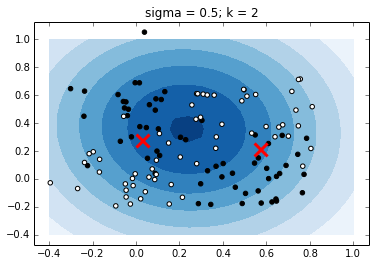

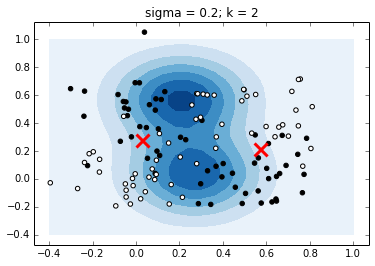

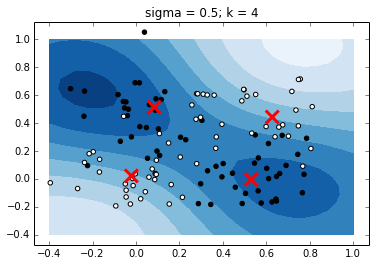

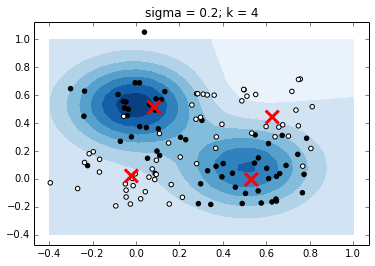

In [19]:
ks = [2,4]
sigmas = [0.5,0.2]

for i,k in enumerate(ks):
    for j,s in enumerate(sigmas):
        rbf = RBFNN(2, k, 1, s)
        rbf.train(trndata[:,0:2], trndata[:,2])
        plot_rbf(rbf)



<img src="Auswahl_2015-11-25_011.png"/>

colour shading determines the propability of belonging to class red or blue


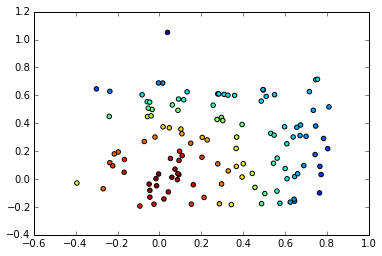

classes via decision boundry


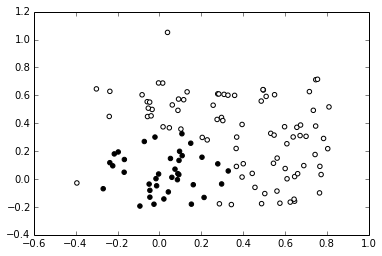

In [20]:
centers = [[0,0],[1,1]]
s = 0.45
k = 2

rbf = RBFNN(2, k, 1, s)
rbf.train(trndata[:,0:2], trndata[:,2], centers=centers)

y = []
for p in trndata[:,0:2]:
    y.append(rbf._y(np.atleast_2d(p)))
y = np.array(y)

print 'colour shading determines the propability of belonging to class red or blue'
plt.scatter(trndata[:,0], trndata[:,1], c=y)
plt.show()

print 'classes via decision boundry'
plt.scatter(trndata[:,0], trndata[:,1], c=y<0.5, cmap='gray')
plt.show()

<img src="Auswahl_2015-11-25_012.png"/>

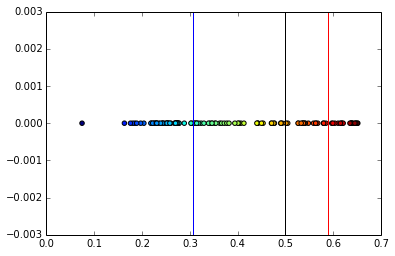

In [35]:
centers = [[0,0],[1,1]]
s = 0.45
k = 2

rbf = RBFNN(2, k, 1, s)
rbf.train(trndata[:,0:2], trndata[:,2], centers=centers)

y = []
for p in trndata[:,0:2]:
    y.append(rbf._y(np.atleast_2d(p)))
y = np.array(y)

plt.scatter(y, np.zeros(y.shape), c=y)
plt.axvline(x=0.5, c='black')
plt.axvline(x=y[y<0.5].mean(), c='blue')
plt.axvline(x=y[y>0.5].mean(), c='red')
plt.show()


colour shading determines the propability of belonging to class red or blue.
the vertical lines (red,blue) show the class means (not centroid positions).
the black line shows the decision boundry.

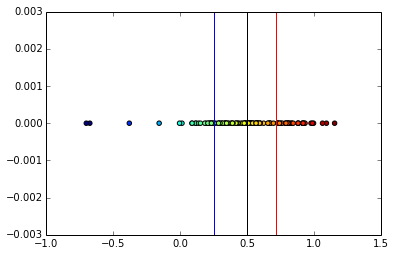

In [34]:
centers = [[0,0],[1,1],[1,0],[0,1]]
s = 0.45
k = 4

rbf = RBFNN(2, k, 1, s)
rbf.train(trndata[:,0:2], trndata[:,2], centers=centers)

y = []
for p in trndata[:,0:2]:
    y.append(rbf._y(np.atleast_2d(p)))
y = np.array(y)

plt.scatter(y, np.zeros(y.shape), c=y)
plt.axvline(x=0.5, c='black')
plt.axvline(x=y[y<0.5].mean(), c='blue')
plt.axvline(x=y[y>0.5].mean(), c='red')
plt.show()

As above, but using 4 supervised centroids.
It can be seen, that the datapoints are not as clearly classified as with the $k=2$ example.
Hence there are more centroids, the distance of a point to its neares centroid is smaller than in the previous plot. Therefor, this result makes perfectly sense. <br>
However, note that if the original features are evaluated against these results, the $k=4$ example will probably lead to more precise results.<br><br>
If a linear classifier learned on the results of the previous plots and applied to the original results will most probably return bad results and vice versa. this is simply due to the fact that the original features are representing a XOR space and the previous results are not.

<img src="Auswahl_2015-11-25_013.png"/>

with $f(g) = log(g)$ and $g = \frac{p(x)}{q(x)} \;\; (1)$ <br>
and $log\frac{a}{b} = -log\frac{b}{a}$ because of $log\frac{a}{b} -log\frac{b}{a}= 0$
$$-D_{KL}(p||q) = \sum_{x\in X} p(x) log\frac{q(x)}{p(x)}$$
and therefor
$$-D_{KL}(p||q) = \sum_{x\in X} p(x) log\frac{q(x)}{p(x)} \stackrel{\textrm{Jensen with (1)}}{\leq} log \sum_{x\in X} p(x) \frac{q(x)}{p(x)} = 
log \sum_{x\in X} q(x) = 0$$

So we see that $D_{KL}(p||q) \geq 0$

also
$$\sum_{x\in X} p(x) log\frac{q(x)}{p(x)}$$
with $q(x)=p(x)$ becomes
$$\sum_{x\in X} p(x) log(1) = \sum_{x\in X} p(x) \cdot 0 = 0$$